First, TN Med Helper is concerned about communities either lacking access to healthcare or losing access to healthcare. They are looking to expand telehealth technologies into the vulnerable communities, and need your help to priortize areas most needing attention. your first objective is to identify which counties in Tennessee have the most severe lack of access to healthcare (either due to lack of hospitals, physicians, or both). Once you have identified these counties, see if you can find any common demographic or economic characteristics for these areas.


In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [258]:
physicians = pd.read_csv('../data/primary_care_physicians.csv')
physicians = physicians.loc[physicians['state'] == 'Tennessee']
physicians = physicians[['FIPS','county', 'primary_care_physicians']]

In [259]:
population = pd.read_csv('../data/population_by_county.csv')
population = population.loc[population['state'] == 'TENNESSEE']
population['county'] = population['county'].str.rsplit(' ', expand = True, n = 1)[0]
population.head()

,FIPS,population,county,state,urban
283,47165,183437,Sumner,TENNESSEE,Urban
284,47169,10231,Trousdale,TENNESSEE,Urban
285,47027,7654,Clay,TENNESSEE,Rural
405,47157,936374,Shelby,TENNESSEE,Urban
406,47077,27977,Henderson,TENNESSEE,Rural


In [260]:
physicians = pd.merge(left = physicians, right = population[['population', 'urban', 'county']])
physicians.head()

,FIPS,county,primary_care_physicians,population,urban
0,47001,Anderson,39.0,76061,Urban
1,47003,Bedford,15.0,48292,Rural
2,47005,Benton,3.0,16140,Rural
3,47007,Bledsoe,1.0,14836,Rural
4,47009,Blount,90.0,129927,Urban


In [261]:
physicians['residents_per_pcp'] = physicians['population']/physicians['primary_care_physicians']
physicians.loc[physicians['residents_per_pcp'] < 1500, 'shadac_category'] = 'adequate'
physicians.loc[(physicians['residents_per_pcp'] >= 1500) & 
       (physicians['residents_per_pcp'] < 3500), 'shadac_category'] = 'moderately inadequate'
physicians.loc[(physicians['residents_per_pcp'] >= 3500), 'shadac_category'] = 'low inadequate'

In [262]:
physicians

,FIPS,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category
0,47001,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate
1,47003,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate
2,47005,Benton,3.0,16140,Rural,5380.000000,low inadequate
3,47007,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate
4,47009,Blount,90.0,129927,Urban,1443.633333,adequate
...,...,...,...,...,...,...,...
90,47181,Wayne,5.0,16693,Rural,3338.600000,moderately inadequate
91,47183,Weakley,18.0,33510,Rural,1861.666667,moderately inadequate
92,47185,White,9.0,26800,Rural,2977.777778,moderately inadequate
93,47187,Williamson,338.0,225389,Urban,666.831361,adequate


In [263]:
unemployment = pd.read_csv('../data/tn_unemployment.csv')
unemployment['Name'] = unemployment['Name'].str.split(' County', n =1, expand = True)[0]
unemployment[['Name', 'LF', 'Employed', 'Unemployed', 'unemployment_rate']].rename(columns = {'Name': 'county'})

,county,LF,Employed,Unemployed,unemployment_rate
0,Anderson,34704,33010,1694,4.9
1,Bedford,20623,19550,1073,5.2
2,Benton,6723,6305,418,6.2
3,Bledsoe,4252,3947,305,7.2
4,Blount,64098,61119,2979,4.6
...,...,...,...,...,...
90,Wayne,6416,6074,342,5.3
91,Weakley,15494,14783,711,4.6
92,White,12085,11484,601,5.0
93,Williamson,129484,125213,4271,3.3


In [264]:
phys_unemploy = pd.merge(left = physicians,
         right = unemployment[['Name', 'LF', 'Employed', 'Unemployed', 'unemployment_rate']].rename(columns = {'Name': 'county'}))

In [265]:
phys_unemploy['pcp_per_100k'] = phys_unemploy['primary_care_physicians'] / phys_unemploy['population'] * 100000

In [266]:
phys_unemploy.head()

,FIPS,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category,LF,Employed,Unemployed,unemployment_rate,pcp_per_100k
0,47001,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate,34704,33010,1694,4.9,51.274635
1,47003,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate,20623,19550,1073,5.2,31.061045
2,47005,Benton,3.0,16140,Rural,5380.000000,low inadequate,6723,6305,418,6.2,18.587361
3,47007,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate,4252,3947,305,7.2,6.740361
4,47009,Blount,90.0,129927,Urban,1443.633333,adequate,64098,61119,2979,4.6,69.269667


In [267]:
phys_low = phys_unemploy.loc[phys_unemploy['shadac_category'] == 'low inadequate']

In [268]:
phys_low.shape

(31, 12)

We probalby only need to report on these 31 counties

In [269]:
phys_low.head(2)

,FIPS,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category,LF,Employed,Unemployed,unemployment_rate,pcp_per_100k
2,47005,Benton,3.0,16140,Rural,5380.0,low inadequate,6723,6305,418,6.2,18.587361
3,47007,Bledsoe,1.0,14836,Rural,14836.0,low inadequate,4252,3947,305,7.2,6.740361


In [270]:
phys_low.groupby('shadac_category')['pcp_per_100k'].describe()

,count,mean,std,min,25%,50%,75%,max
shadac_category,,,,,,,,
low inadequate,31.0,16.703241,8.694359,0.0,14.545973,17.120356,23.883569,28.372014


In [271]:
phys_unemploy.groupby('shadac_category')['pcp_per_100k'].describe()

,count,mean,std,min,25%,50%,75%,max
shadac_category,,,,,,,,
adequate,14.0,100.320661,35.717673,67.018059,68.426325,91.402839,123.226635,176.831892
low inadequate,31.0,16.703241,8.694359,0.000000,14.545973,17.120356,23.883569,28.372014
moderately inadequate,50.0,43.975750,8.807418,29.952675,36.755673,42.845498,51.094514,64.709407


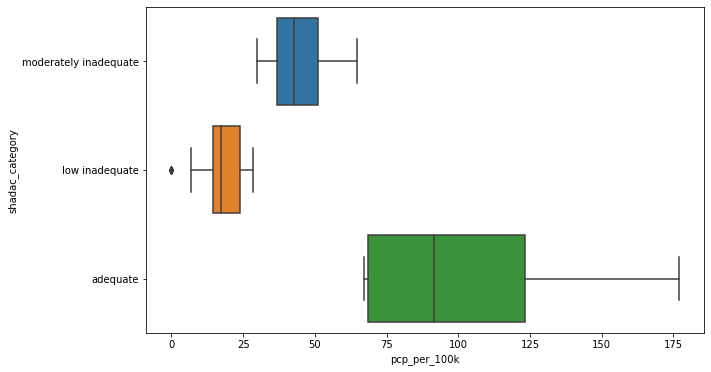

In [272]:
plt.figure(figsize = (10,6))

sns.boxplot(data = phys_unemploy,
           x = 'pcp_per_100k',
           y = 'shadac_category');

In [273]:
phys_low

,FIPS,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category,LF,Employed,Unemployed,unemployment_rate,pcp_per_100k
2,47005,Benton,3.0,16140,Rural,5.380000e+03,low inadequate,6723,6305,418,6.2,18.587361
3,47007,Bledsoe,1.0,14836,Rural,1.483600e+04,low inadequate,4252,3947,305,7.2,6.740361
7,47015,Cannon,3.0,14178,Urban,4.726000e+03,low inadequate,6566,6275,291,4.4,21.159543
11,47023,Chester,4.0,17190,Urban,4.297500e+03,low inadequate,8424,8062,362,4.3,23.269343
13,47027,Clay,2.0,7654,Rural,3.827000e+03,low inadequate,2743,2557,186,6.8,26.130128
16,47033,Crockett,0.0,14399,Rural,inf,low inadequate,6838,6494,344,5.0,0.000000
28,47057,Grainger,5.0,23101,Urban,4.620200e+03,low inadequate,9546,9008,538,5.6,21.644085
30,47061,Grundy,0.0,13344,Rural,inf,low inadequate,4977,4655,322,6.5,0.000000
33,47067,Hancock,1.0,6587,Rural,6.587000e+03,low inadequate,2141,1997,144,6.7,15.181418
34,47069,Hardeman,4.0,25443,Rural,6.360750e+03,low inadequate,9189,8514,675,7.3,15.721416


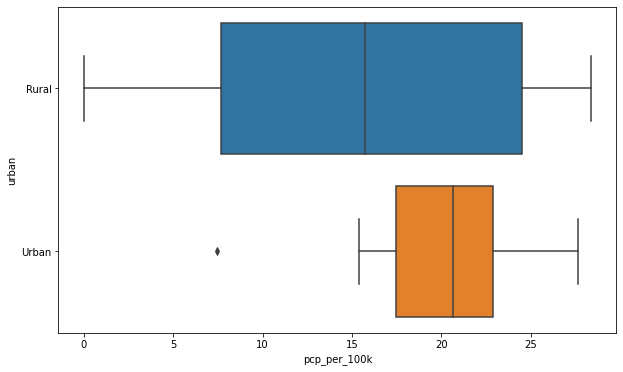

In [274]:
plt.figure(figsize = (10,6))

sns.boxplot(data = phys_low,
           x = 'pcp_per_100k',
           y = 'urban');

In [275]:
counties = gpd.read_file('../data/county/tncounty.shp')

In [276]:
low_counties = pd.merge(left = counties,
                    right = phys_low,
                   left_on = 'NAME',
                   right_on = 'county')

In [277]:
low_counties.head(2)

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,FIPS,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category,LF,Employed,Unemployed,unemployment_rate,pcp_per_100k
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",47023,Chester,4.0,17190,Urban,4297.500000,low inadequate,8424,8062,362,4.3,23.269343
1,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774....",47167,Tipton,17.0,61447,Urban,3614.529412,low inadequate,27741,26295,1446,5.2,27.666119


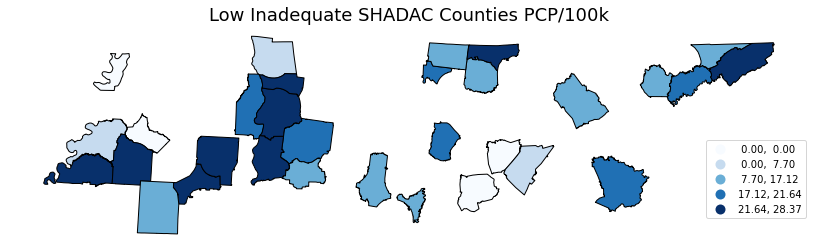

In [278]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(16,4))

low_counties.plot(column = 'pcp_per_100k', 
              edgecolor = 'black',
              legend = True,
              cmap = 'Blues',
              scheme="NaturalBreaks",
              ax = ax)


# Position the legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5))

# Add a title
plt.title('Low Inadequate SHADAC Counties PCP/100k', fontsize = 18)

ax.axis('off');

Use Hospitals.csv to get a list of all the hospitals in TN.  Then cross-reference that with the Closures database excel file to ID which TN hospitals have closed in the last few years.  

Then find a way to ID which counties these hospitals were in.

In [279]:
hospitals = pd.read_csv('../data/Hospitals.csv')
hospitals = hospitals.loc[hospitals['STATE'] == 'TN']
hospitals.head(2)

,X,Y,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
515,-9.409026e+06,4.210878e+06,517,14737331,STARR REGIONAL MEDICAL CENTER ETOWAH,886 HIGHWAY 411 NORTH,ETOWAH,TN,37331,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.starrregional.com/,NOT AVAILABLE,WOODS MEMORIAL HOSPITAL,47,NON-PROFIT,-999,72,LEVEL III,Y
535,-9.535209e+06,4.348723e+06,537,3438562,JACKSON COUNTY HOSPITAL,620 HOSPITAL DRIVE,GAINESBORO,TN,38562,NOT AVAILABLE,...,2014/02/12 00:00:00,NOT AVAILABLE,477446,NOT AVAILABLE,47,NON-PROFIT,-999,-999,NOT AVAILABLE,N


In [280]:
hospitals = hospitals[['NAME', 'ADDRESS', 'CITY', 'ZIP', 'STATE_ID', 'ST_FIPS', 'TTL_STAFF', 'BEDS']]
hospitals.head(2)

,NAME,ADDRESS,CITY,ZIP,STATE_ID,ST_FIPS,TTL_STAFF,BEDS
515,STARR REGIONAL MEDICAL CENTER ETOWAH,886 HIGHWAY 411 NORTH,ETOWAH,37331,NOT AVAILABLE,47,-999,72
535,JACKSON COUNTY HOSPITAL,620 HOSPITAL DRIVE,GAINESBORO,38562,477446,47,-999,-999


In [281]:
closures = pd.read_excel('../data/Closures-Database-for-Web.xlsx',
              sheet_name = 'Sheet1',
             header = 0,
             usecols = 'B,C,D,E,F,J,K')

In [282]:
closures = closures.loc[closures['State'] == 'TN']

In [283]:
closures.head()

,Hospital,Address,City,State,Zip,# of Beds,Closure Month
2,Jellico Medical Center,188 HOSPITAL LANE,JELLICO,TN,37762,54,November
3,Perry Community Hospital,2718 Squirrel Hollow Drive,Linden,TN,37096,25,November
7,Cumberland River Hospital,100 OLD JEFFERSON ST,Celina,TN,38551,1,August
13,Decatur County General Hospital,969 Tennessee Ave S,Parsons,TN,38363,40,April
30,Jamestown Regional Medical Center,436 CENTRAL AVENUE WEST,Jamestown,TN,38556,54,June


In [284]:
closed_hos = pd.merge(left = hospitals,
                    right = closures,
                   left_on = 'ZIP',
                   right_on = 'Zip')

In [285]:
closed_hos = closed_hos[['NAME', 'ADDRESS', 'CITY', 'ZIP', 'STATE_ID', 'ST_FIPS', 'TTL_STAFF', 'Closure Month']]

In [286]:
closed_hos

,NAME,ADDRESS,CITY,ZIP,STATE_ID,ST_FIPS,TTL_STAFF,Closure Month
0,STARR REGIONAL MEDICAL CENTER ETOWAH,886 HIGHWAY 411 NORTH,ETOWAH,37331,NOT AVAILABLE,47,-999,December
1,JELLICO MEDICAL CENTER,188 HOSPITAL LANE,JELLICO,37762,878115,47,-999,November
2,PERRY COMMUNITY HOSPITAL,2718 SQUIRREL HOLLOW DRIVE,LINDEN,37096,1073589,47,-999,November
3,MCKENZIE REGIONAL HOSPITAL,161 HOSPITAL DRIVE,MC KENZIE,38201,978254,47,-999,September
4,DECATUR COUNTY GENERAL HOSPITAL,969 TENNESSEE AVENUE SOUTH,PARSONS,38363,993774,47,-999,April
5,UNITY MEDICAL CENTER,481 INTERSTATE DRIVE,MANCHESTER,37355,221354,47,-999,July
6,UNITED REGIONAL MEDICAL CENTER,1001 MCARTHUR ST,MANCHESTER,37355,222762,47,-999,July
7,TENNOVA HEALTHCARE - JAMESTOWN,436 CENTRAL AVENUE WEST,JAMESTOWN,38556,1012863,47,-999,June
8,HAYWOOD PARK COMMUNITY HOSPITAL,2545 NORTH WASHINGTON AVENUE,BROWNSVILLE,38012,1025284,47,-999,July
9,COPPER BASIN MEDICAL CENTER,144 MEDICAL CENTER DR,COPPERHILL,37317,NOT AVAILABLE,47,-999,May


This is the breakdown of cities with closed hospitals and their counties that I found from google searches
City--County
(Etowah--McMinn);;
(Jellico--Campbell);;
(Linden--Perry);;
(Mc Kenzie--Carroll, Henry, Weakley);;
(Parsons--Decatur);;
(Manchester--Coffee);;
(Jamestown--Fentress);;
(Brownsville--Haywood);;
(Copperhill--Polk);;
(Celina--Clay);;
(Carthage--Smith);;
(Humboldt--Gibson, Madison);;
(Greenville--Greene);;


Only Perry, Haywood, and Clay counties are low-inadequate shadac that had closures


In [287]:
tn_divisions = pd.read_csv('../data/tn_divisions.csv')

In [288]:
tn_divisions.head()

,County,Division
0,Anderson County,East
1,Bledsoe County,East
2,Blount County,East
3,Bradley County,East
4,Campbell County,East


This info could potential be useful to see if there's a correlation with division and the counties in need of healthcare (box plot)

Use the 2020 County Health Rankings Data excel to first ID the health ranking of the low inadequate counties|

In [289]:
rank = pd.read_excel('../data/County_Health_Rankings/2020 County Health Rankings Data - v2.xlsx',
              sheet_name = 'Outcomes & Factors Rankings',
             header = 1,
             usecols = 'A,B,C,E,F,G,H')

rank = rank.loc[rank['State'] == 'Tennessee']
#Setting the header at 0 will show the merged-cells top headings.  
#This will confuse pandas during the loc function when calling on State, so I'm starting with the sub headings.  
#"Rank" refers to Health outcomes ranking and "Rank.1" refers to Health Factors ranking

In [290]:
rank.head()

,FIPS,State,County,Rank,Quartile,Rank.1,Quartile.1
2470,47000,Tennessee,NaN,NaN,NaN,NaN,NaN
2471,47001,Tennessee,Anderson,34,2,17,1
2472,47003,Tennessee,Bedford,44,2,72,4
2473,47005,Tennessee,Benton,91,4,80,4
2474,47007,Tennessee,Bledsoe,11,1,93,4


In [291]:
low_counties_rank = pd.merge(left = phys_low,
                    right = rank,
                   left_on = 'county',
                   right_on = 'County')

In [292]:
low_counties_rank

,FIPS_x,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category,LF,Employed,Unemployed,unemployment_rate,pcp_per_100k,FIPS_y,State,County,Rank,Quartile,Rank.1,Quartile.1
0,47005,Benton,3.0,16140,Rural,5.380000e+03,low inadequate,6723,6305,418,6.2,18.587361,47005,Tennessee,Benton,91,4,80,4
1,47007,Bledsoe,1.0,14836,Rural,1.483600e+04,low inadequate,4252,3947,305,7.2,6.740361,47007,Tennessee,Bledsoe,11,1,93,4
2,47015,Cannon,3.0,14178,Urban,4.726000e+03,low inadequate,6566,6275,291,4.4,21.159543,47015,Tennessee,Cannon,65,3,44,2
3,47023,Chester,4.0,17190,Urban,4.297500e+03,low inadequate,8424,8062,362,4.3,23.269343,47023,Tennessee,Chester,6,1,22,1
4,47027,Clay,2.0,7654,Rural,3.827000e+03,low inadequate,2743,2557,186,6.8,26.130128,47027,Tennessee,Clay,95,4,86,4
5,47033,Crockett,0.0,14399,Rural,inf,low inadequate,6838,6494,344,5.0,0.000000,47033,Tennessee,Crockett,58,3,68,3
6,47057,Grainger,5.0,23101,Urban,4.620200e+03,low inadequate,9546,9008,538,5.6,21.644085,47057,Tennessee,Grainger,53,3,35,2
7,47061,Grundy,0.0,13344,Rural,inf,low inadequate,4977,4655,322,6.5,0.000000,47061,Tennessee,Grundy,92,4,87,4
8,47067,Hancock,1.0,6587,Rural,6.587000e+03,low inadequate,2141,1997,144,6.7,15.181418,47067,Tennessee,Hancock,94,4,92,4
9,47069,Hardeman,4.0,25443,Rural,6.360750e+03,low inadequate,9189,8514,675,7.3,15.721416,47069,Tennessee,Hardeman,84,4,90,4


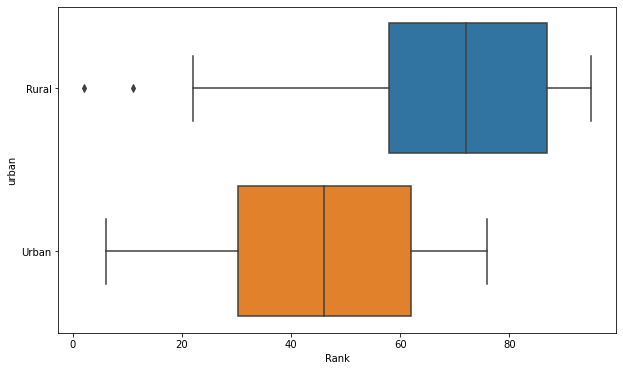

In [293]:
plt.figure(figsize = (10,6))

sns.boxplot(data = low_counties_rank,
           x = 'Rank',
           y = 'urban');

This is not very helpfull. Rural counties have a higher median rank, but it's not cut and dry, especially since Moore county is ranked 2 behind Williamson County, even though it only has 1 pcp for the entire county

Second, TN Med Helper is interested in reducing the number of potentially preventable hospitalizations. Do areas that lack access to healthcare tend to have higher rates of emergency department visits or hospitalizations? Is there an association between the percentage of beneficiaries who had an annual wellness visit and rate of hospitalizations or emergency department visits?



In [294]:
annual_wellness = pd.read_csv('../data/Medicare_Disparities_by_population/annual_wellness.csv')
emergency_department = pd.read_csv('../data/Medicare_Disparities_by_population/emergency_department.csv')
hospitalizations = pd.read_csv('../data/Medicare_Disparities_by_population/hospitalizations.csv')

annual_wellness = annual_wellness.loc[annual_wellness['state'] == 'TENNESSEE']

emergency_department = emergency_department.loc[emergency_department['state'] == 'TENNESSEE']

hospitalizations = hospitalizations.loc[hospitalizations['state'] == 'TENNESSEE']

emergency_department = emergency_department[['condition', 'county', 'analysis_value']]

annual_wellness = annual_wellness[['condition', 'county', 'analysis_value']]

hospitalizations = hospitalizations[['condition', 'county', 'analysis_value']]

In [295]:
annual_wellness['county']=annual_wellness['county'].str.split(' County', expand = True)[0]
emergency_department['county']=emergency_department['county'].str.split(' County', expand = True)[0]
hospitalizations['county']=hospitalizations['county'].str.split(' County', expand = True)[0]

In [296]:
annual_wellness.head()

,condition,county,analysis_value
2428,Annual Wellness Visit,Anderson,35
2429,Annual Wellness Visit,Bedford,46
2430,Annual Wellness Visit,Benton,30
2431,Annual Wellness Visit,Bledsoe,19
2432,Annual Wellness Visit,Blount,43


In [297]:
phys_unemploy_annual = pd.merge(left = phys_unemploy,
                    right = annual_wellness,
                   left_on = 'county',
                   right_on = 'county')

In [298]:
phys_unemploy_annual

,FIPS,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category,LF,Employed,Unemployed,unemployment_rate,pcp_per_100k,condition,analysis_value
0,47001,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate,34704,33010,1694,4.9,51.274635,Annual Wellness Visit,35
1,47003,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate,20623,19550,1073,5.2,31.061045,Annual Wellness Visit,46
2,47005,Benton,3.0,16140,Rural,5380.000000,low inadequate,6723,6305,418,6.2,18.587361,Annual Wellness Visit,30
3,47007,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate,4252,3947,305,7.2,6.740361,Annual Wellness Visit,19
4,47009,Blount,90.0,129927,Urban,1443.633333,adequate,64098,61119,2979,4.6,69.269667,Annual Wellness Visit,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,47181,Wayne,5.0,16693,Rural,3338.600000,moderately inadequate,6416,6074,342,5.3,29.952675,Annual Wellness Visit,15
91,47183,Weakley,18.0,33510,Rural,1861.666667,moderately inadequate,15494,14783,711,4.6,53.715309,Annual Wellness Visit,30
92,47185,White,9.0,26800,Rural,2977.777778,moderately inadequate,12085,11484,601,5.0,33.582090,Annual Wellness Visit,35
93,47187,Williamson,338.0,225389,Urban,666.831361,adequate,129484,125213,4271,3.3,149.962953,Annual Wellness Visit,48


In [299]:
phys_unemploy_emergency = pd.merge(left = phys_unemploy,
                    right = emergency_department,
                   left_on = 'county',
                   right_on = 'county')

In [300]:
phys_unemploy_emergency.head(1)

,FIPS,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category,LF,Employed,Unemployed,unemployment_rate,pcp_per_100k,condition,analysis_value
0,47001,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate,34704,33010,1694,4.9,51.274635,All Emergency Department Visits,617


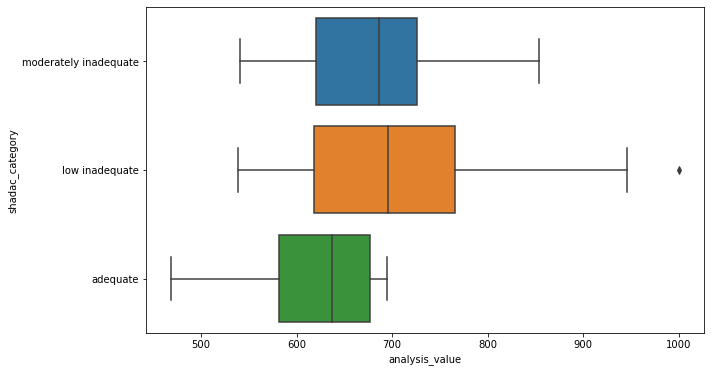

In [301]:
plt.figure(figsize = (10,6))

sns.boxplot(data = phys_unemploy_emergency,
           x = 'analysis_value',
           y = 'shadac_category');

In [302]:
phys_unemploy_hospitalizations = pd.merge(left = phys_unemploy,
                    right = hospitalizations,
                   left_on = 'county',
                   right_on = 'county')

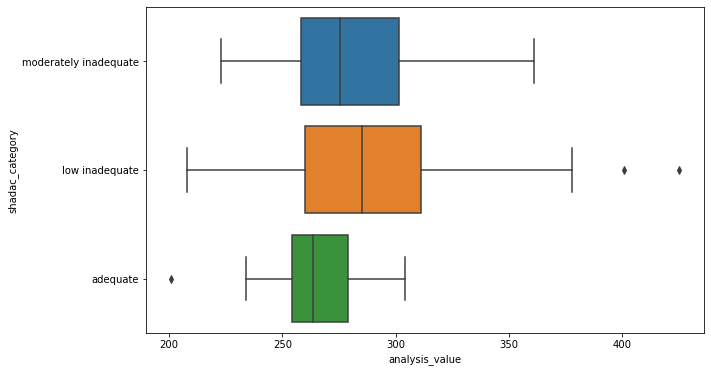

In [303]:
plt.figure(figsize = (10,6))

sns.boxplot(data = phys_unemploy_hospitalizations,
           x = 'analysis_value',
           y = 'shadac_category');

low inadaquet counties have a slightly higher median for both hospitalizatoins and emergency department visitys per 1000 medicare benneficiaries

In [304]:
phys_unemploy_emergency = phys_unemploy_emergency.rename(columns={'condition': 'ED', 'analysis_value': 'ED rate'})

phys_unemploy_hospitalizations = phys_unemploy_hospitalizations.rename(columns={'condition': 'Hos', 'analysis_value': 'Hos rate'})

phys_unemploy_annual = phys_unemploy_annual.rename(columns={'condition': 'Ann', 'analysis_value': 'Visit%'})

In [305]:
phys_unemploy_emergency.head()



,FIPS,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category,LF,Employed,Unemployed,unemployment_rate,pcp_per_100k,ED,ED rate
0,47001,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate,34704,33010,1694,4.9,51.274635,All Emergency Department Visits,617
1,47003,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate,20623,19550,1073,5.2,31.061045,All Emergency Department Visits,646
2,47005,Benton,3.0,16140,Rural,5380.000000,low inadequate,6723,6305,418,6.2,18.587361,All Emergency Department Visits,783
3,47007,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate,4252,3947,305,7.2,6.740361,All Emergency Department Visits,750
4,47009,Blount,90.0,129927,Urban,1443.633333,adequate,64098,61119,2979,4.6,69.269667,All Emergency Department Visits,581


In [306]:
phys_unemploy_annual.head()

,FIPS,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category,LF,Employed,Unemployed,unemployment_rate,pcp_per_100k,Ann,Visit%
0,47001,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate,34704,33010,1694,4.9,51.274635,Annual Wellness Visit,35
1,47003,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate,20623,19550,1073,5.2,31.061045,Annual Wellness Visit,46
2,47005,Benton,3.0,16140,Rural,5380.000000,low inadequate,6723,6305,418,6.2,18.587361,Annual Wellness Visit,30
3,47007,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate,4252,3947,305,7.2,6.740361,Annual Wellness Visit,19
4,47009,Blount,90.0,129927,Urban,1443.633333,adequate,64098,61119,2979,4.6,69.269667,Annual Wellness Visit,43


In [307]:
phys_unemploy_hospitalizations.head()

,FIPS,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category,LF,Employed,Unemployed,unemployment_rate,pcp_per_100k,Hos,Hos rate
0,47001,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate,34704,33010,1694,4.9,51.274635,All-Cause Hospitalizations,267
1,47003,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate,20623,19550,1073,5.2,31.061045,All-Cause Hospitalizations,271
2,47005,Benton,3.0,16140,Rural,5380.000000,low inadequate,6723,6305,418,6.2,18.587361,All-Cause Hospitalizations,274
3,47007,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate,4252,3947,305,7.2,6.740361,All-Cause Hospitalizations,313
4,47009,Blount,90.0,129927,Urban,1443.633333,adequate,64098,61119,2979,4.6,69.269667,All-Cause Hospitalizations,267


In [308]:
ALLmerge = pd.merge(left = phys_unemploy_annual[['county','shadac_category', 'Ann', 'Visit%']],
         right = phys_unemploy_emergency[['county','shadac_category', 'ED', 'ED rate']])

In [309]:
ALLmerge.head()

,county,shadac_category,Ann,Visit%,ED,ED rate
0,Anderson,moderately inadequate,Annual Wellness Visit,35,All Emergency Department Visits,617
1,Bedford,moderately inadequate,Annual Wellness Visit,46,All Emergency Department Visits,646
2,Benton,low inadequate,Annual Wellness Visit,30,All Emergency Department Visits,783
3,Bledsoe,low inadequate,Annual Wellness Visit,19,All Emergency Department Visits,750
4,Blount,adequate,Annual Wellness Visit,43,All Emergency Department Visits,581


In [310]:
ALLmerge = pd.merge(left = ALLmerge[['county','shadac_category', 'Ann', 'Visit%', 'ED', 'ED rate']],
         right = phys_unemploy_hospitalizations[['county','shadac_category', 'Hos', 'Hos rate']])

In [311]:
ALLmerge.head()

,county,shadac_category,Ann,Visit%,ED,ED rate,Hos,Hos rate
0,Anderson,moderately inadequate,Annual Wellness Visit,35,All Emergency Department Visits,617,All-Cause Hospitalizations,267
1,Bedford,moderately inadequate,Annual Wellness Visit,46,All Emergency Department Visits,646,All-Cause Hospitalizations,271
2,Benton,low inadequate,Annual Wellness Visit,30,All Emergency Department Visits,783,All-Cause Hospitalizations,274
3,Bledsoe,low inadequate,Annual Wellness Visit,19,All Emergency Department Visits,750,All-Cause Hospitalizations,313
4,Blount,adequate,Annual Wellness Visit,43,All Emergency Department Visits,581,All-Cause Hospitalizations,267


In [312]:
ALLmerge[['Visit%', 'ED rate']].corr()

,Visit%,ED rate
Visit%,1.000000,-0.480607
ED rate,-0.480607,1.000000


In [313]:
ALLmerge[['Visit%', 'Hos rate']].corr()

,Visit%,Hos rate
Visit%,1.000000,-0.480732
Hos rate,-0.480732,1.000000


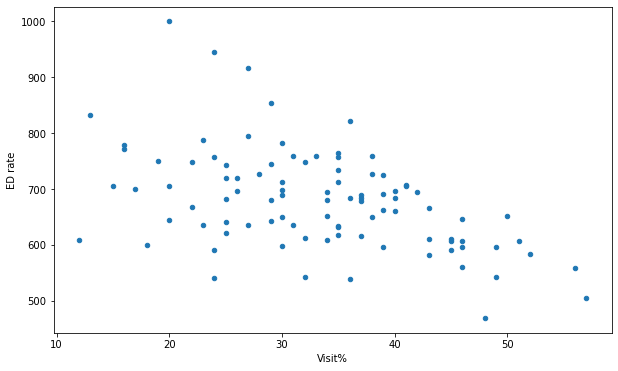

In [314]:
ALLmerge.plot(kind = 'scatter',
             x = 'Visit%',
             y = 'ED rate',
             figsize = (10,6));

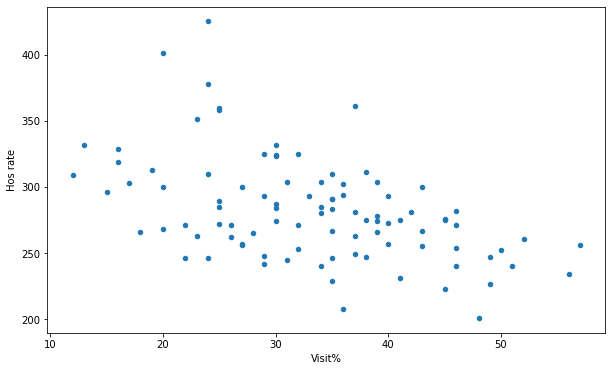

In [315]:
ALLmerge.plot(kind = 'scatter',
             x = 'Visit%',
             y = 'Hos rate',
             figsize = (10,6));

There is a negative correlation between beneficiaries who receive an annual visit and both hospitalization rates and emergency department visits.

Finally, TN Med Helper is trying to identify specific subpopulations to focus more attention on. Using data from [the Behavioral Risk Factor Surveillance System](https://www.cdc.gov/brfss/index.html), build a model to predict whether an individual has not had a checkup in the last year. Apply this model to the counties you identified above to predict how likely it is that the average person from those counties has not had a checkup in the last year. Which groups within these counties might need to be focused on to maximize the impact of TN Med Helper's efforts?